# Analysis of the Impact of Covid-19 Pandemic on the Global Economy

This project aims to conduct an in-depth analysis of the "Impact of Covid-19 Pandemic on the Global Economy" dataset. We aim to uncover novel insights about the pandemic's economic effects, focusing on specific industries, regional disparities, social inequality, the long-term implications of remote work, the impact on mental health and productivity, and the effectiveness of post-pandemic recovery strategies.

We're specificly attempting to analyse the Stringency and Economic Impact: How does the stringency of lockdown measures correlate with the economic impact across different countries, adjusted for GDP per capita and human development index.

### Importing libraires

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Stage 1: Data Acquisition

In [2]:
data_dir = 'C:/Users/udayk/OneDrive - stevens.edu/Documents/GitHub/Covid-19-Impact-Analysis'
os.chdir(data_dir)
filename = "data.csv"
data = pd.read_csv(filename)

## Stage 2: Data Preprocessing

Let's check for missing values

In [3]:
print(data.isnull().sum())

iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
Unnamed: 9                 50418
Unnamed: 10                50418
Unnamed: 11                50418
Unnamed: 12                50418
Unnamed: 13                50418
dtype: int64


Now, let's take a look at the Data Types

In [4]:
print(data.dtypes)


iso_code                    object
location                    object
date                        object
total_cases                float64
total_deaths               float64
stringency_index           float64
population                   int64
gdp_per_capita             float64
human_development_index    float64
Unnamed: 9                 float64
Unnamed: 10                float64
Unnamed: 11                float64
Unnamed: 12                float64
Unnamed: 13                float64
dtype: object


For the columns with some missing values, we fill in with mean (for numerical data)

In [5]:
data['total_cases'].fillna(data['total_cases'].mean(), inplace=True)
data['total_deaths'].fillna(data['total_deaths'].mean(), inplace=True)
data['stringency_index'].fillna(data['stringency_index'].mean(), inplace=True)
data['gdp_per_capita'].fillna(data['gdp_per_capita'].mean(), inplace=True)
data['human_development_index'].fillna(data['human_development_index'].mean(), inplace=True)


Columns Unnamed: 9 through Unnamed: 13 seem to have a lot of missing data (or possibly are empty). It would be best to drop them.

In [6]:
data = data.drop(columns=['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'])

In [7]:
print(data.isnull().sum())

iso_code                   0
location                   0
date                       0
total_cases                0
total_deaths               0
stringency_index           0
population                 0
gdp_per_capita             0
human_development_index    0
dtype: int64


The date column is currently of the object datatype. To facilitate time series analysis, let's convert this to a datetime datatype.

In [8]:
data['date'] = pd.to_datetime(data['date'])

Now, let's check for duplicate rows and remove them.

In [9]:
print(data.duplicated().sum())

0


In [10]:
data.drop_duplicates(inplace=True)

## Stage 3: Exploratory Data Analysis (EDA)

Basic statistical details:

In [11]:
print(data.describe())

        total_cases   total_deaths  stringency_index    population  \
count  5.041800e+04   50418.000000      50418.000000  5.041800e+04   
mean   6.621927e+04    2978.767819         56.162022  4.251601e+07   
std    3.919481e+05   12204.916580         25.512844  1.564607e+08   
min    0.000000e+00       0.000000          0.000000  8.090000e+02   
25%    1.480000e+02      18.000000         41.670000  1.399491e+06   
50%    2.057500e+03     200.000000         56.162022  8.278737e+06   
75%    2.871075e+04    2978.767819         76.390000  2.913681e+07   
max    8.154595e+06  219674.000000        100.000000  1.439324e+09   

       gdp_per_capita  human_development_index  
count    50418.000000             50418.000000  
mean     20818.706240                 0.720139  
std      19248.613445                 0.150680  
min        661.240000                 0.000000  
25%       6253.104000                 0.640000  
50%      16409.288000                 0.723000  
75%      27936.896000     

Let's try to understand the distribution of certain numerical columns:

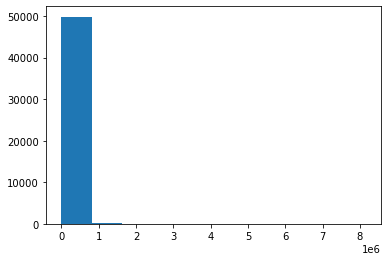

In [16]:
plt.hist(data['total_cases'])
plt.savefig('v-histogram dist of total_cases.png', dpi=700,bbox_inches='tight')
plt.show()

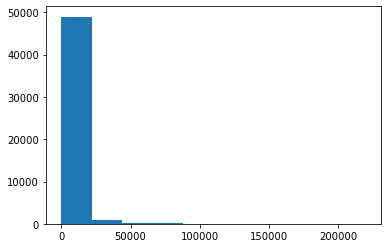

In [17]:
plt.hist(data['total_deaths'])
plt.savefig('v-histogram dist of total_deaths.png', dpi=700,bbox_inches='tight')
plt.show()

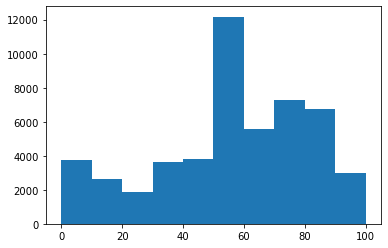

In [18]:
plt.hist(data['stringency_index'])
plt.savefig('v-histogram dist of stringency_index.png', dpi=700,bbox_inches='tight')
plt.show()

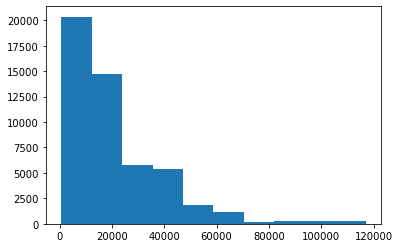

In [19]:
plt.hist(data['gdp_per_capita'])
plt.savefig('v-histogram dist of gdp_per_capita.png', dpi=700,bbox_inches='tight')
plt.show()

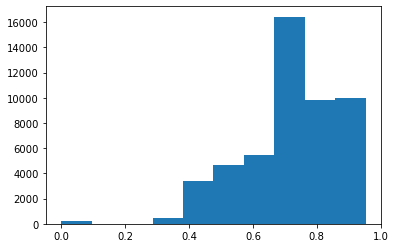

In [20]:
plt.hist(data['human_development_index'])
plt.savefig('v-histogram dist of human_development_index.png', dpi=700,bbox_inches='tight')
plt.show()

To see the correlation matrix:

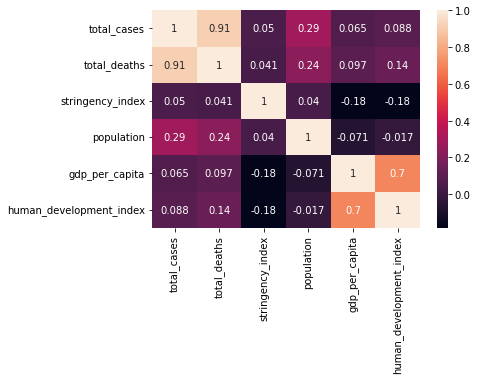

In [22]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.savefig('v-correlation matrix.png', dpi=700,bbox_inches='tight')
plt.show()

Pairplot for visualizing the Pairwise Repationships:

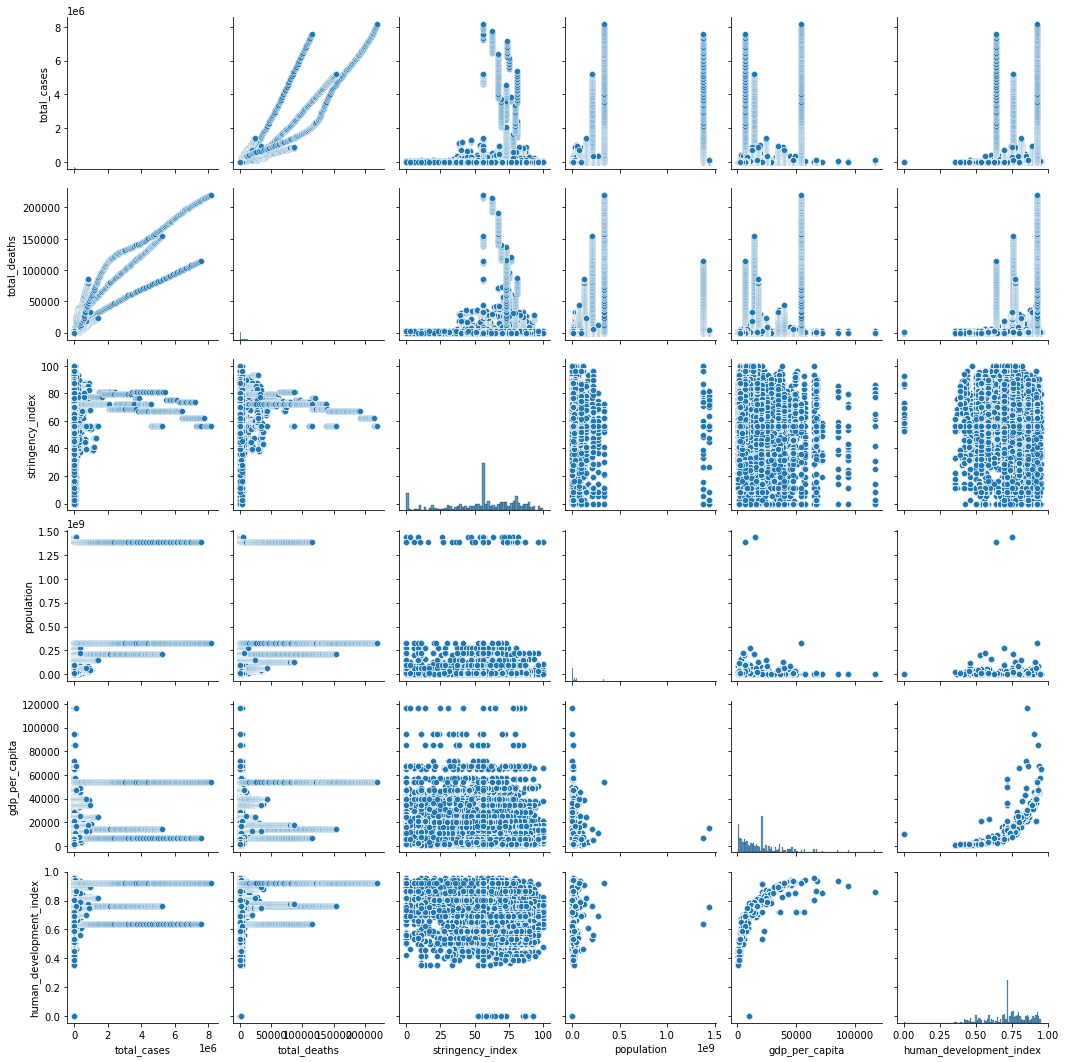

In [23]:
sns.pairplot(data)
plt.savefig('v-pairwise relationships.png', dpi=700,bbox_inches='tight')
plt.show()

Correlation matrix with respect to Stringency and Economic Impact:

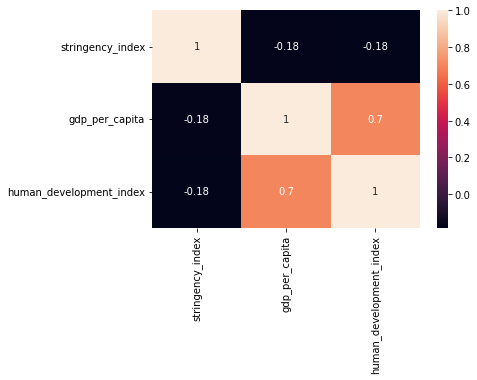

In [25]:
corr = data[['stringency_index', 'gdp_per_capita', 'human_development_index']].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.savefig('v-correlation heatmap, SEI.png', dpi=700,bbox_inches='tight')
plt.show()

The heatmap will give you a visual representation of the correlation between stringency measures and the two indicators of economic impact, gdp_per_capita and human_development_index. You can infer from this the relationship between the strictness of COVID-19 measures and economic factors.

Remember that correlation does not imply causation. While this analysis can give you a sense of the relationship between these variables, it can't tell you whether changes in one variable cause changes in another. For that, we would need a more complex causal analysis.

Also note that the stringency index is not a direct measure of economic impact. It is a measure of how strict a country's policies are in response to COVID-19. The economic impact of COVID-19 would ideally be measured using direct economic indicators, such as changes in GDP, unemployment rates, etc., which are not available in this dataset.

## Stage 4: Feature Engineering and Selection

For this stage, since we are exploring the relationship between 'stringency_index', 'gdp_per_capita', and 'human_development_index', these will be our main features. Thus, we don't need a specific feature selection step.

## Stage 5: Model Selection and Training

## Stage 6: Model Evaluation

## Stage 7: Interpretation and Insights Extraction